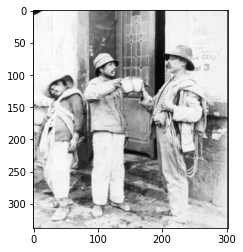

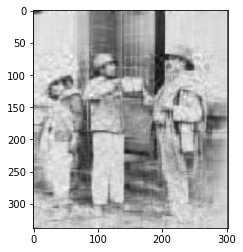

In [8]:
# -*- coding: utf-8 -*-
 
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from sklearn import datasets
from skimage import io

 
def getImgAsMat(index):
    ds = datasets.fetch_olivetti_faces()
    return np.mat(ds.images[index])
 
def getImgAsMatFromFile(filename):
    img = io.imread(filename,as_gray=True,plugin=None)
    return np.mat(img) 
 
def plotImg(imgMat):
    plt.imshow(imgMat, cmap=plt.cm.gray)
    plt.show()
 
def recoverBySVD(imgMat, k):
    # singular value decomposition
    U, s, V = la.svd(imgMat)
    # choose top k important singular values (or eigens)
    Uk = U[:, 0:k]
    Sk = np.diag(s[0:k])
    Vk = V[0:k, :]
    # recover the image
    imgMat_new = Uk * Sk * Vk
    return imgMat_new
 
 
# -------------------- main --------------------- #
A = getImgAsMatFromFile('pic.JPG')
plotImg(A)
A_new = recoverBySVD(A, 20)
plotImg(A_new)